In [347]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [348]:
df=pd.read_excel('Data_Train (1).xlsx')
dt=pd.read_excel('Data_Test (1).xlsx')

In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [350]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [351]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6014    False
6015    False
6016    False
6017    False
6018    False
Length: 6019, dtype: bool

In [352]:
dt.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1229    False
1230    False
1231    False
1232    False
1233    False
Length: 1234, dtype: bool

In [353]:
df.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [354]:
df.nunique()

Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
Price                1373
dtype: int64

In [355]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [356]:
dt.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


### Data Cleaning

In [357]:
# Spliting "Name" Feature to 'Brand', 'CarName' and 'Model'.
def splitName(x):
    x['Brand']   = x['Name'].apply(lambda x: x.split(' ')[0].strip())
    x['CarName'] = x['Name'].apply(lambda x: x.split(' ')[1].strip())
    x['Model'] = x['Name'].apply(lambda x:' '.join(x.split(' ')[2:]))
    x.drop(['Name'],axis=1, inplace=True)

#### Finding Missing Values

In [358]:
#Splitting Power, Engine, & Mileage to remove Units  
def splitIn(x):
    x['Power'  ].replace('null bhp',np.nan,inplace=True)
    x['Mileage'].replace('0.0 kmpl',np.nan,inplace=True)
    for i in ['Power', 'Engine', 'Mileage']:      
        x[i] = x[i].apply(lambda x: float(x.split()[0].strip()) if not pd.isna(x) else x)

In [359]:
def imputeNaN(x):
    for i in ['Power', 'Engine', 'Seats','Mileage']:
        x[i] = x.groupby(['Model'])[i].transform(lambda y: y.fillna(y.mean()))
        #Some Values will still be left with na.
        x[i].fillna(x[i].mean(), inplace=True)

In [360]:
def preprocessData(data):
    splitName(data)
    splitIn(data)
    imputeNaN(data)


In [361]:
preprocessData(df)
preprocessData(dt)

In [362]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,CarName,Model
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon,R LXI CNG
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta,1.6 CRDi SX Option
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz,V
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga,VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4,New 2.0 TDI Multitronic


#### Visualising the data 

Text(0.5, 1.0, 'Name of cars')

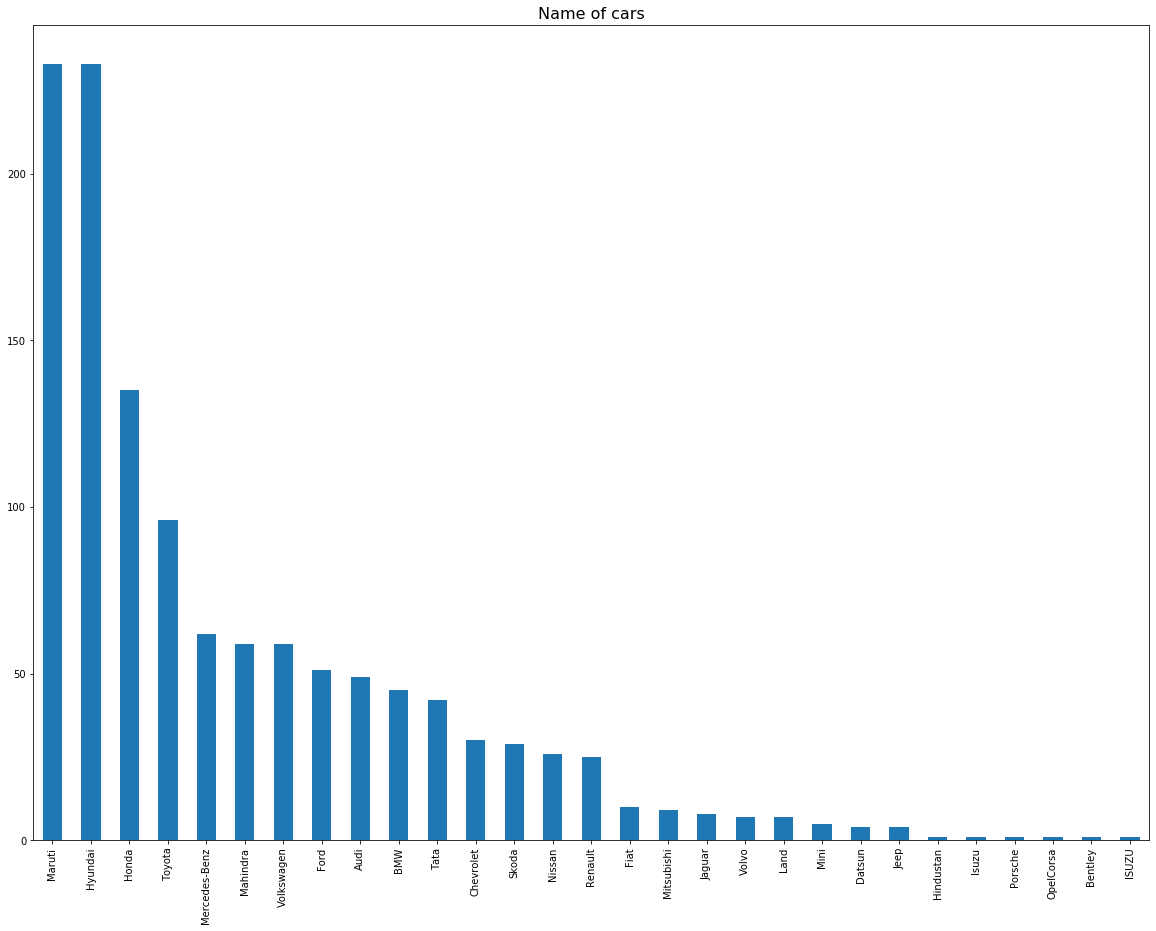

In [363]:
plt.figure(figsize=(20,15))
dt.Brand.value_counts().plot(kind='bar')
plt.title("Name of cars",fontdict={'fontsize':16})

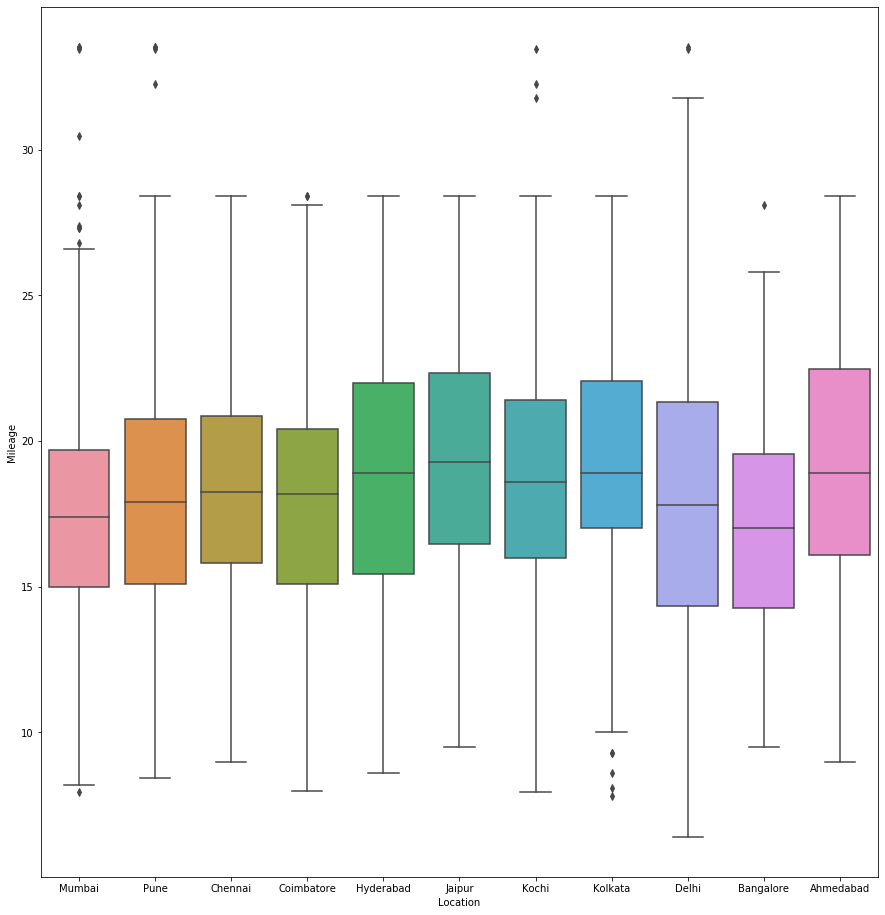

In [364]:
plt.figure(figsize=(15,16))
sns.boxplot(x = 'Location', y = 'Mileage', data = df) 
plt.show()

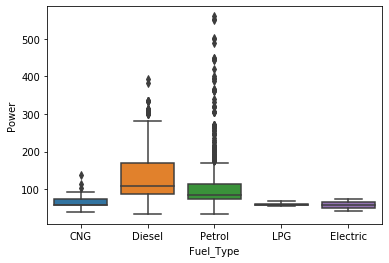

In [365]:
sns.boxplot(x = 'Fuel_Type', y = 'Power', data = df)
plt.show()

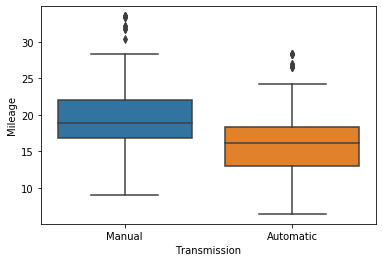

In [366]:
sns.boxplot(x = 'Transmission', y = 'Mileage', data = df)
plt.show()

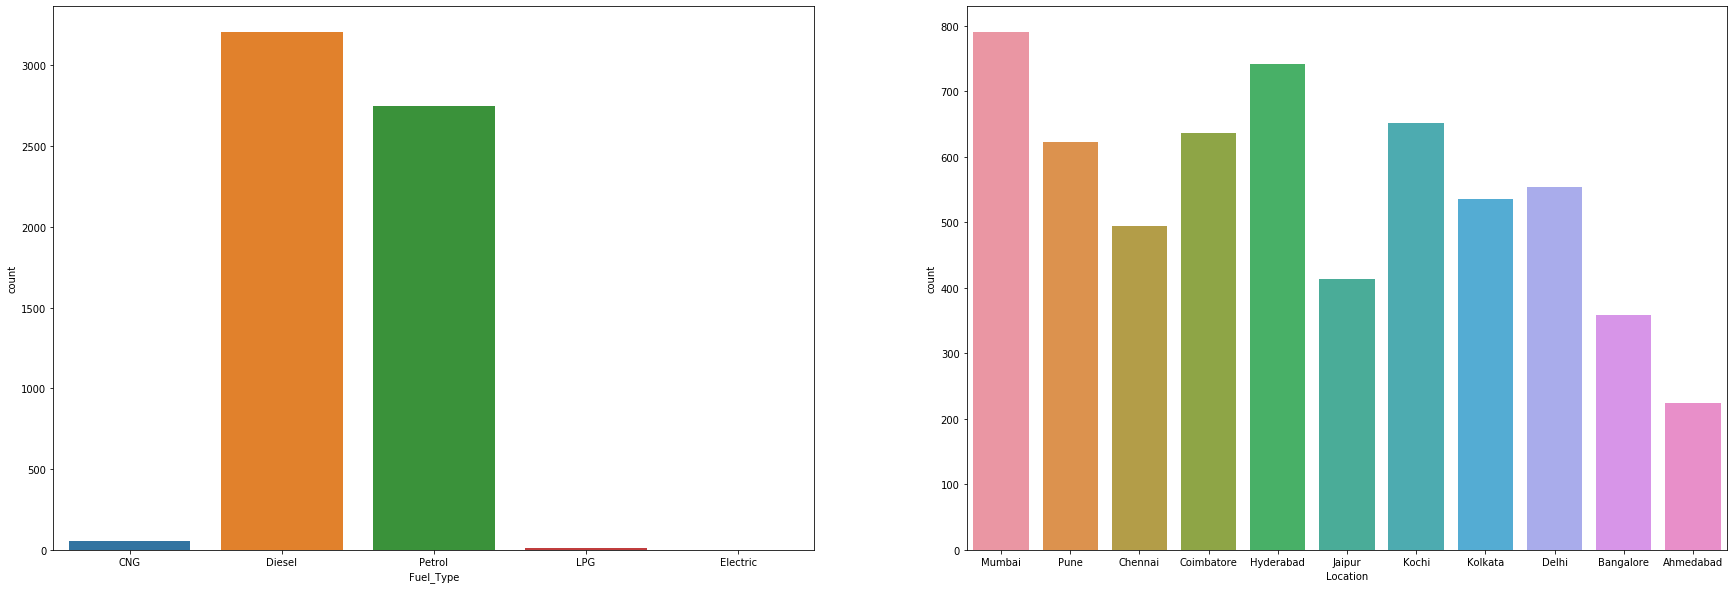

In [367]:
# Categorical variables visualisation
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
sns.countplot(x='Fuel_Type',data=df)
plt.subplot(1,2,2)
sns.countplot(x='Location',data=df)
plt.show()

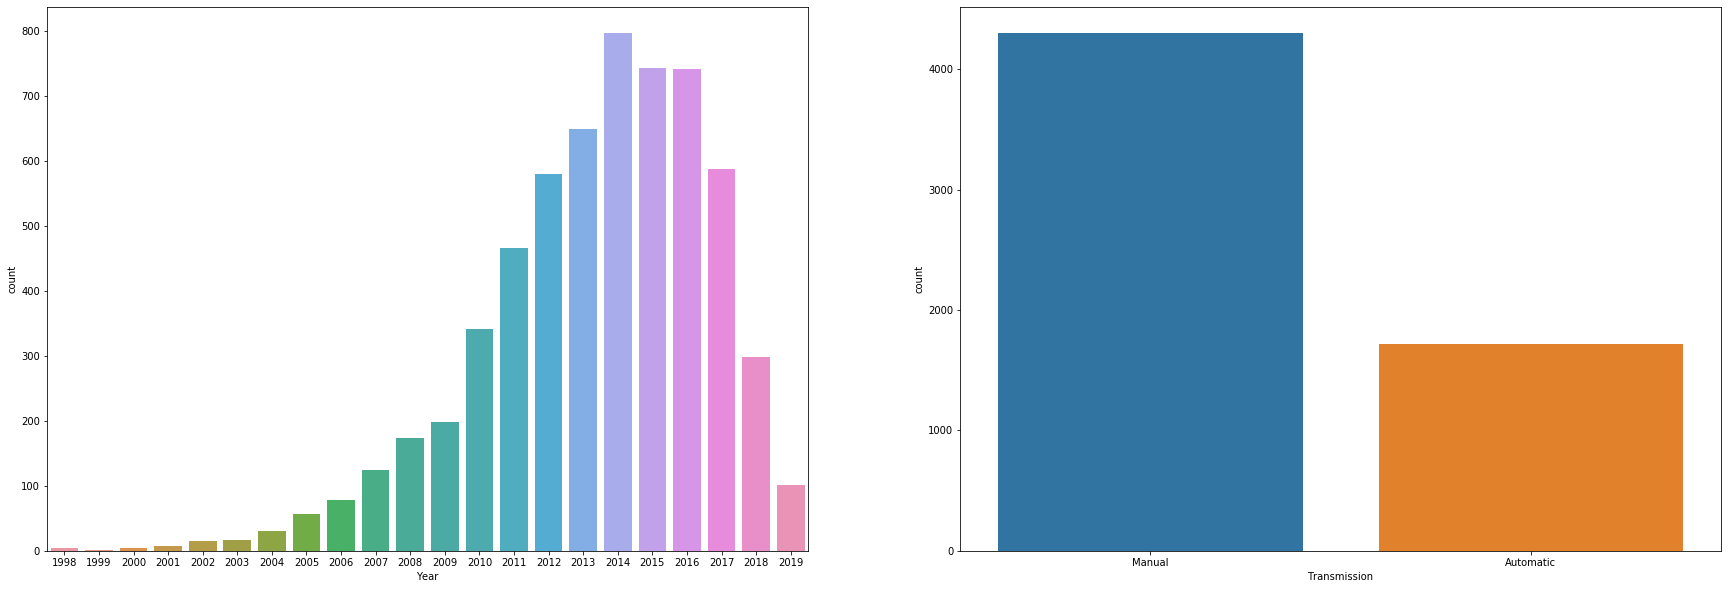

In [368]:
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
sns.countplot(x='Year',data=df)
plt.subplot(1,2,2)
sns.countplot(x='Transmission',data=df)
plt.show()

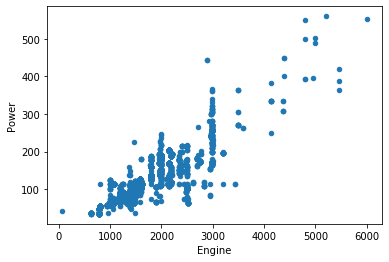

In [369]:
df.plot(kind='scatter',x='Engine',y='Power')
plt.show()

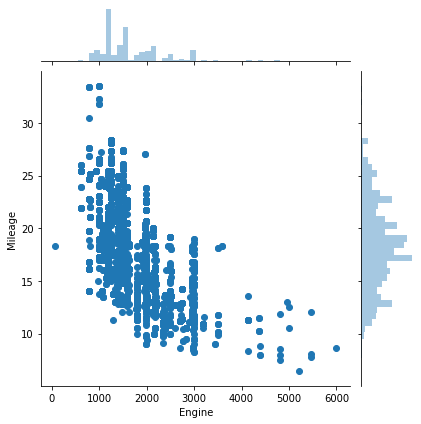

In [370]:
sns.jointplot(kind='scatter',x='Engine',y='Mileage',data=df)
plt.show()

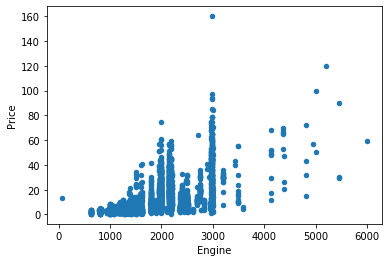

In [371]:
df.plot(kind='scatter',x='Engine',y='Price')
plt.show()

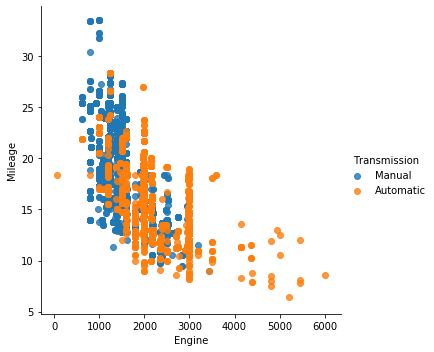

In [372]:
sns.lmplot(x='Engine',y='Mileage',data=df,hue='Transmission',fit_reg=False)
plt.show()

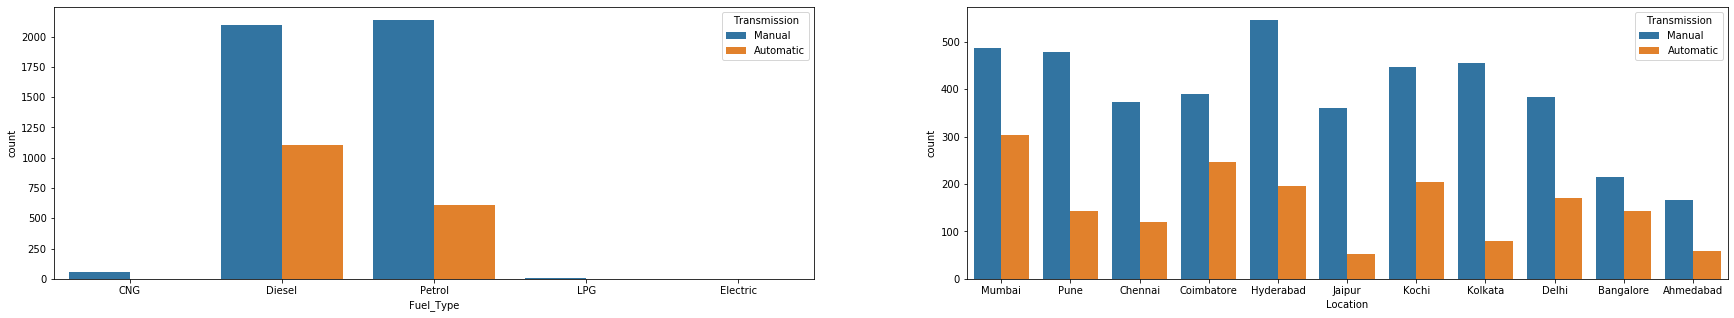

In [373]:
plt.figure(figsize=(30,5))
plt.subplot(1,2,1)
sns.countplot(x='Fuel_Type', hue='Transmission', data=df);
plt.subplot(1,2,2)
sns.countplot(x='Location', hue='Transmission', data=df);
plt.show()

In [374]:
pd.crosstab(df['Brand'], df['Transmission']).T

Brand,Ambassador,Audi,BMW,Bentley,Chevrolet,Datsun,Fiat,Force,Ford,Honda,...,Mitsubishi,Nissan,Porsche,Renault,Skoda,Smart,Tata,Toyota,Volkswagen,Volvo
Transmission,,,,,,,,,,,,,,,,,,,,,
Automatic,0,236,267,1,9,0,0,0,39,130,...,6,12,17,18,93,1,11,99,59,20
Manual,1,0,0,0,112,13,28,3,261,478,...,21,79,1,127,80,0,175,312,256,1


In [375]:
dt.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,CarName,Model
0,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.200000,4.0,Maruti,Alto,K10 LXI CNG
1,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.300000,5.0,Maruti,Alto,800 2016-2019 LXI
2,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.800000,7.0,Toyota,Innova,Crysta Touring Sport 2.4 MT
3,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,110.350179,5.0,Toyota,Etios,Liva GD
4,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.850000,5.0,Hyundai,i20,Magna


### Categorizing the variables 

In [376]:
from sklearn.preprocessing import LabelEncoder
le_brands= LabelEncoder()
le_models = LabelEncoder()
le_locations = LabelEncoder()
le_fuel_types = LabelEncoder()
le_transmissions = LabelEncoder()
le_owner_types = LabelEncoder()

In [377]:
all_brands = list(set(list(df.Brand))) + list(dt.Brand)
all_models = list(set(list(df.Model))) + list(dt.Model)
all_locations = list(set(list(df.Location))) + list(dt.Location)
all_fuel_types = list(set(list(df.Fuel_Type))) + list(dt.Fuel_Type)
all_transmissions = list(set(list(df.Transmission))) + list(dt.Transmission)
all_owner_types = list(set(list(df.Owner_Type))) + list(dt.Owner_Type)

In [378]:
le_brands.fit(all_brands)
le_models.fit(all_models)
le_locations.fit(all_locations)
le_fuel_types.fit(all_fuel_types)
le_transmissions.fit(all_transmissions)
le_owner_types.fit(all_owner_types)

LabelEncoder()

In [379]:
df['Brand'] = le_brands.transform(df['Brand'])
df['Model'] = le_models.transform(df['Model'])
df['Location'] = le_locations.transform(df['Location'])
df['Fuel_Type'] = le_fuel_types.transform(df['Fuel_Type'])
df['Transmission'] = le_transmissions.transform(df['Transmission'])
df['Owner_Type'] = le_owner_types.transform(df['Owner_Type'])

In [380]:
dt['Brand'] = le_brands.transform(dt['Brand'])
dt['Model'] = le_models.transform(dt['Model'])
dt['Location'] = le_locations.transform(dt['Location'])
dt['Fuel_Type'] = le_fuel_types.transform(dt['Fuel_Type'])
dt['Transmission'] = le_transmissions.transform(dt['Transmission'])
dt['Owner_Type'] = le_owner_types.transform(dt['Owner_Type'])


In [381]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,CarName,Model
0,9,2010,72000,0,1,0,26.60,998.0,58.16,5.0,1.75,19,Wagon,1323
1,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,12.50,11,Creta,244
2,2,2011,46000,4,1,0,18.20,1199.0,88.70,5.0,4.50,10,Jazz,1577
3,2,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,6.00,19,Ertiga,1605
4,3,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74,1,A4,1265


In [382]:
#Re-ordering the columns
df = df[['Brand', 'Model', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
      'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']]
dt = dt[['Brand', 'Model', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
      'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']]

In [383]:
dt.head()

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,19,1153,4,2014,40929,0,1,0,32.26,998.0,58.200000,4.0
1,19,664,3,2013,54493,4,1,2,24.70,796.0,47.300000,5.0
2,30,920,9,2017,34000,1,1,0,13.68,2393.0,147.800000,7.0
3,30,1215,5,2012,139000,1,1,0,23.59,1364.0,110.350179,5.0
4,11,1238,9,2014,29000,4,1,0,18.50,1197.0,82.850000,5.0


In [384]:
Y_train_data = df.iloc[:, -1]
X_train_data = df.iloc[:,0 : -1]
X_test = dt.iloc[:,:]

In [385]:
X_train_data

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,19,1323,9,2010,72000,0,1,0,26.60,998.0,58.16,5.0
1,11,244,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0
2,10,1577,2,2011,46000,4,1,0,18.20,1199.0,88.70,5.0
3,19,1605,2,2012,87000,1,1,0,20.77,1248.0,88.76,7.0
4,1,1265,3,2013,40670,1,0,2,15.20,1968.0,140.80,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,19,1605,4,2014,27365,1,1,0,28.40,1248.0,74.00,5.0
6015,11,21,6,2015,100000,1,1,0,24.40,1120.0,71.00,5.0
6016,18,933,6,2012,55000,1,1,2,14.00,2498.0,112.00,8.0
6017,19,1330,8,2013,46000,4,1,0,18.90,998.0,67.10,5.0


In [386]:
X_test

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,19,1153,4,2014,40929,0,1,0,32.26,998.0,58.200000,4.0
1,19,664,3,2013,54493,4,1,2,24.70,796.0,47.300000,5.0
2,30,920,9,2017,34000,1,1,0,13.68,2393.0,147.800000,7.0
3,30,1215,5,2012,139000,1,1,0,23.59,1364.0,110.350179,5.0
4,11,1238,9,2014,29000,4,1,0,18.50,1197.0,82.850000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1229,31,983,5,2011,89411,1,1,0,20.54,1598.0,103.600000,5.0
1230,31,1130,9,2015,59000,4,0,0,17.21,1197.0,103.600000,5.0
1231,23,986,8,2012,28000,1,1,0,23.08,1461.0,63.100000,5.0
1232,31,1130,10,2013,52262,4,0,3,17.20,1197.0,103.600000,5.0


In [387]:
Y_train_data

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
6014     4.75
6015     4.00
6016     2.90
6017     2.65
6018     2.50
Name: Price, Length: 6019, dtype: float64

In [388]:
from sklearn.model_selection import train_test_split
#Splitting the training set into Training and testidation sets
X_train, X_test, Y_train, Y_test = train_test_split(X_train_data, Y_train_data, test_size = 0.2)

In [389]:
Y_train

5453     0.75
2749     2.35
4658     0.95
1979     9.00
5441    30.35
        ...  
372      9.49
5423    23.00
2685     2.50
315      1.50
2143     3.42
Name: Price, Length: 4815, dtype: float64

In [390]:
Y_val

3269     4.38
5599    27.00
921      7.75
1069     3.85
289      6.90
        ...  
512     13.56
5290     6.30
635     11.25
1871     2.35
3621     4.65
Name: Price, Length: 1204, dtype: float64

#### Feature Scaling using Standardisation(z-score)

In [391]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [392]:
X_train_data = sc.fit_transform(X_train_data)

In [393]:
X_train_data

array([[ 0.3046357 ,  0.57976663,  1.14365818, ..., -1.03907476,
        -1.02798101, -0.34522109],
       [-0.62630409, -1.37206043,  1.48198899, ..., -0.06505947,
         0.24734929, -0.34522109],
       [-0.74267156,  1.03923287, -1.22465746, ..., -0.70384004,
        -0.45554439, -0.34522109],
       ...,
       [ 0.18826823, -0.12571303,  0.12866576, ...,  1.46267685,
        -0.01881312,  3.37667843],
       [ 0.3046357 ,  0.59242909,  0.80532737, ..., -1.03907476,
        -0.86041116, -0.34522109],
       [-1.4408764 , -0.07687213, -0.20966505, ..., -1.14248049,
        -1.03847756, -0.34522109]])

In [394]:
Y_train_data = Y_train_data.values.reshape((len(Y_train_data), 1))

### Model

In [395]:
#XGBoost
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators = 500,learning_rate=0.1, max_depth=4, min_child_weight=2, n_jobs=4)
xgb.fit(X_train, Y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_val, Y_val)], 
             verbose=False)
Y_pred = xgb.predict(X_val)

[22:43:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [396]:
Y_pred

array([ 5.021131 , 17.880873 ,  6.624854 , ..., 12.39234  ,  2.7326467,
        6.014224 ], dtype=float32)

In [397]:
def score(y_pred, y_true):
    error = np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean() ** 0.5
    score = 1 - error
    return score

In [398]:
#Eliminating negative values in prediction for score calculation
for i in range(len(Y_pred)):
     if Y_pred[i] < 0:
        Y_pred[i] = 0
        
y_true = Y_val

In [399]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from statistics import mean
        
print("Score: ",score(Y_pred,y_true))
print("Mean Absolute Error:",mean_absolute_error(y_true, Y_pred))

Score:  0.9441878616456402
Mean Absolute Error: 0.782606740555296


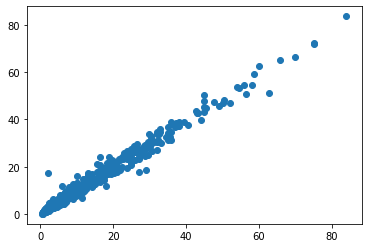

In [400]:
plt.scatter(y_true, Y_pred)

In [401]:
from sklearn import metrics

In [402]:
metrics.explained_variance_score(y_true, Y_pred)

0.9824029677062326

In [403]:
predictions=xgb.predict(X_test)

In [404]:
predictions

array([ 5.4929285,  5.147226 ,  1.138376 , ..., 48.3245   , 39.270622 ,
        6.5452747], dtype=float32)

In [405]:
#Saving the predictions to an excel sheet
pd.DataFrame(predictions, columns = ['Price']).to_excel("predictions.xlsx")

In [406]:
predictions.mean()

9.159363

In [407]:
df['Price'].mean()

9.479468350224273

In [408]:
from sklearn.metrics import r2_score
r2_score(y_true, Y_pred)

0.9823993022683272

In [410]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_true, Y_pred))
print(rms)

1.357884248561203
